In [1]:
# ## 1. Import Libraries

import pandas as pd
import numpy as np
from scipy.sparse import coo_matrix
from implicit.bpr import BayesianPersonalizedRanking
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

# Fix random seed for reproducibility
np.random.seed(42)

c:\Users\ziaja\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 2. Load and Explore Data

In [21]:
# Load books and ratings data
books = pd.read_csv("../data/books.csv")
ratings = pd.read_csv("../data/ratings.csv")

print(f"Books dataset shape: {books.shape}")
print(f"Ratings dataset shape: {ratings.shape}")

# Display the first few rows of each dataset
print("\nBooks data preview:")
books.head()

Books dataset shape: (10000, 23)
Ratings dataset shape: (5976479, 3)

Books data preview:


,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [25]:
# Display the first few rows of each dataset
print("Ratings data preview:")
ratings.head()

Ratings data preview:


,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3


In [ ]:
# Load the datasets
books = pd.read_csv('../data/books.csv')
ratings = pd.read_csv('../data/ratings.csv')

# Display the first few rows of each dataset
print("Books dataset shape:", books.shape)
print("Ratings dataset shape:", ratings.shape)

# Display sample data
print("\nBooks sample:")
print(books.head())

print("\nRatings sample:")
print(ratings.head())

# Check for missing values
print("\nMissing values in books dataset:")
print(books.isnull().sum())

print("\nMissing values in ratings dataset:")
print(ratings.isnull().sum())


Books dataset shape: (10000, 23)
Ratings dataset shape: (5976479, 3)

Books sample:
   book_id  goodreads_book_id  best_book_id  work_id  books_count       isbn  \
0        1            2767052       2767052  2792775          272  439023483   
1        2                  3             3  4640799          491  439554934   
2        3              41865         41865  3212258          226  316015849   
3        4               2657          2657  3275794          487   61120081   
4        5               4671          4671   245494         1356  743273567   

         isbn13                      authors  original_publication_year  \
0  9.780439e+12              Suzanne Collins                     2008.0   
1  9.780440e+12  J.K. Rowling, Mary GrandPré                     1997.0   
2  9.780316e+12              Stephenie Meyer                     2005.0   
3  9.780061e+12                   Harper Lee                     1960.0   
4  9.780743e+12          F. Scott Fitzgerald                

## 3. Data Preprocessing


Missing values in books: 2975
Missing values in ratings: 0

Ratings statistics:
count    5.976479e+06
mean     3.919866e+00
std      9.910868e-01
min      1.000000e+00
25%      3.000000e+00
50%      4.000000e+00
75%      5.000000e+00
max      5.000000e+00
Name: rating, dtype: float64


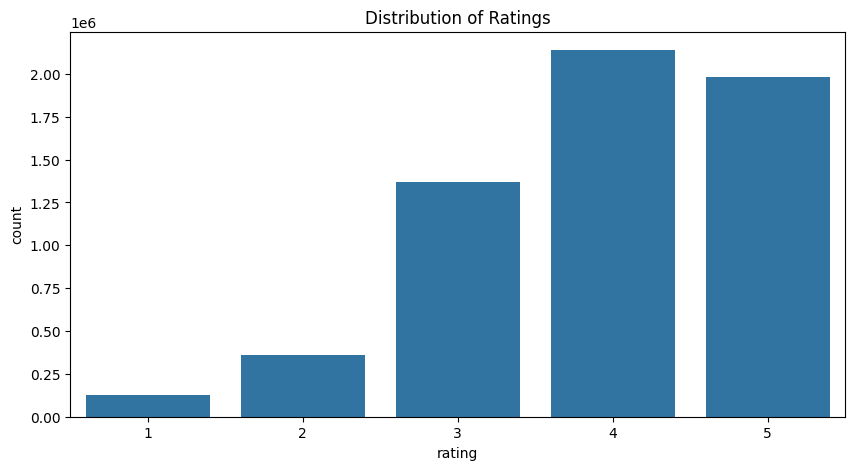


Number of unique users: 53424
Number of unique books in ratings: 10000
Number of books in books dataset: 10000

Original ratings shape: (5976479, 3)
Filtered ratings shape: (5976479, 3)
Retained 100.00% of ratings


In [3]:
# Check for missing values
print("\nMissing values in books:", books.isnull().sum().sum())
print("Missing values in ratings:", ratings.isnull().sum().sum())

# Basic statistics of ratings
print("\nRatings statistics:")
print(ratings['rating'].describe())

# Distribution of ratings
plt.figure(figsize=(10, 5))
sns.countplot(x='rating', data=ratings)
plt.title('Distribution of Ratings')
plt.show()

# Check number of unique users and books in ratings
n_users = ratings['user_id'].nunique()
n_books = ratings['book_id'].nunique()
print(f"\nNumber of unique users: {n_users}")
print(f"Number of unique books in ratings: {n_books}")
print(f"Number of books in books dataset: {books['book_id'].nunique()}")

# Filter out users with less than 5 ratings to reduce sparsity
user_counts = ratings['user_id'].value_counts()
min_ratings = 5
active_users = user_counts[user_counts >= min_ratings].index
filtered_ratings = ratings[ratings['user_id'].isin(active_users)]

print(f"\nOriginal ratings shape: {ratings.shape}")
print(f"Filtered ratings shape: {filtered_ratings.shape}")
print(f"Retained {filtered_ratings.shape[0] / ratings.shape[0]:.2%} of ratings")

# Create label encoders for user_id and book_id for contiguous indices
user_encoder = LabelEncoder()
book_encoder = LabelEncoder()

filtered_ratings['user_idx'] = user_encoder.fit_transform(filtered_ratings['user_id'])
filtered_ratings['book_idx'] = book_encoder.fit_transform(filtered_ratings['book_id'])

# Create a mapping from encoded indices back to original IDs
user_idx_to_id = {idx: id for idx, id in enumerate(user_encoder.classes_)}
book_idx_to_id = {idx: id for idx, id in enumerate(book_encoder.classes_)}
book_id_to_idx = {id: idx for idx, id in enumerate(book_encoder.classes_)}

# Create a mapping from book_id to book information
book_id_to_info = books.set_index('book_id')[['title', 'authors']].to_dict('index')

## 4. Train-Test Split


In [4]:
# Split data into training and test sets
train_data, test_data = train_test_split(
    filtered_ratings, 
    test_size=0.2, 
    random_state=42, 
    stratify=filtered_ratings['user_idx']
)

print(f"\nTraining set: {train_data.shape[0]} ratings")
print(f"Test set: {test_data.shape[0]} ratings")



Training set: 4781183 ratings
Test set: 1195296 ratings


## 5. Create Sparse Matrices


In [13]:
# Convert ratings to implicit feedback (1 for rated, 0 for not rated)
# We could also use the actual ratings as confidence values
train_data['confidence'] = 1.0
test_data['confidence'] = 1.0

# Create sparse matrix for training data
train_sparse = coo_matrix(
    (train_data['confidence'], (train_data['user_idx'], train_data['book_idx'])),
    shape=(len(user_encoder.classes_), len(book_encoder.classes_))
)

# Create sparse matrix for test data
test_sparse = coo_matrix(
    (test_data['confidence'], (test_data['user_idx'], test_data['book_idx'])),
    shape=(len(user_encoder.classes_), len(book_encoder.classes_))
)

print(f"\nTrain matrix shape: {train_sparse.shape}")
print(f"Test matrix shape: {test_sparse.shape}")
print(f"Sparsity: {1.0 - (train_sparse.nnz / (train_sparse.shape[0] * train_sparse.shape[1])):.4%}")


Train matrix shape: (53424, 10000)
Test matrix shape: (53424, 10000)
Sparsity: 99.1050%


## 6. Train BPR Model

In [14]:
# Initialize and train the BPR model
bpr_model = BayesianPersonalizedRanking(
    factors=50,  # Number of latent factors
    learning_rate=0.01,
    regularization=0.01,
    iterations=50,  # Increase for better results
    random_state=42
)

# Train the model on the training data
bpr_model.fit(train_sparse, show_progress=True)


c:\Users\ziaja\AppData\Local\Programs\Python\Python310\lib\site-packages\implicit\utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.03372621536254883 seconds
  warnings.warn(
100%|██████████| 50/50 [00:27<00:00,  1.82it/s, train_auc=91.15%, skipped=5.23%]


## 7. Evaluation Functions

In [ ]:
def precision_at_k(model, train_matrix, test_matrix, k=10):
    """
    Compute Precision@K for all users in the test set.
    
    Note: train_matrix and test_matrix must be in CSR format for efficiency.
    """
    n_users = train_matrix.shape[0]
    precisions = []
    
    # Ensure matrices are in CSR format for efficient row access
    if not isinstance(train_matrix, type(train_sparse.tocsr())):
        train_matrix = train_matrix.tocsr()
    if not isinstance(test_matrix, type(test_sparse.tocsr())):
        test_matrix = test_matrix.tocsr()
    
    for user_idx in tqdm(range(n_users)):
        # Skip users with no ratings in test set
        if test_matrix[user_idx].nnz == 0:
            continue
        
        # Get the items this user has interacted with in the training set
        train_items = set(train_matrix.getrow(user_idx).indices)
        
        # Get the items this user has interacted with in the test set
        test_items = set(test_matrix.getrow(user_idx).indices)
        
        if not test_items:
            continue
        
        # Get recommendations (exclude items from training)
        recommendations = model.recommend(user_idx, train_matrix, N=k, filter_already_liked_items=True)
        recommended_items = [item for item, _ in recommendations]
        
        # Calculate precision
        hits = len(set(recommended_items) & test_items)
        precision = hits / min(k, len(recommended_items))  # Fixed: using len of recommendations
        precisions.append(precision)
    
    return np.mean(precisions) if precisions else 0

def recall_at_k(model, train_matrix, test_matrix, k=10):
    """
    Compute Recall@K for all users in the test set.
    
    Note: train_matrix and test_matrix must be in CSR format for efficiency.
    """
    n_users = train_matrix.shape[0]
    recalls = []
    
    # Ensure matrices are in CSR format for efficient row access
    if not isinstance(train_matrix, type(train_sparse.tocsr())):
        train_matrix = train_matrix.tocsr()
    if not isinstance(test_matrix, type(test_sparse.tocsr())):
        test_matrix = test_matrix.tocsr()
    
    for user_idx in tqdm(range(n_users)):
        # Skip users with no ratings in test set
        if test_matrix[user_idx].nnz == 0:
            continue
        
        # Get the items this user has interacted with in the training set
        train_items = set(train_matrix.getrow(user_idx).indices)
        
        # Get the items this user has interacted with in the test set
        test_items = set(test_matrix.getrow(user_idx).indices)
        
        if not test_items:
            continue
        
        # Get recommendations (exclude items from training)
        recommendations = model.recommend(user_idx, train_matrix, N=k, filter_already_liked_items=True)
        recommended_items = [item for item, _ in recommendations]
        
        # Calculate recall
        hits = len(set(recommended_items) & test_items)
        recall = hits / len(test_items)
        recalls.append(recall)
    
    return np.mean(recalls) if recalls else 0

def ndcg_at_k(model, train_matrix, test_matrix, k=10):
    """
    Compute NDCG@K for all users in the test set.
    
    Note: train_matrix and test_matrix must be in CSR format for efficiency.
    """
    n_users = train_matrix.shape[0]
    ndcgs = []
    
    # Ensure matrices are in CSR format for efficient row access
    if not isinstance(train_matrix, type(train_sparse.tocsr())):
        train_matrix = train_matrix.tocsr()
    if not isinstance(test_matrix, type(test_sparse.tocsr())):
        test_matrix = test_matrix.tocsr()
    
    for user_idx in tqdm(range(n_users)):
        # Skip users with no ratings in test set
        if test_matrix[user_idx].nnz == 0:
            continue
        
        # Get the items this user has interacted with in the test set
        test_items = set(test_matrix.getrow(user_idx).indices)
        
        if not test_items:
            continue
        
        # Get recommendations (exclude items from training)
        recommendations = model.recommend(user_idx, train_matrix, N=k, filter_already_liked_items=True)
        recommended_items = [item for item, _ in recommendations]
        
        # Calculate DCG
        dcg = 0
        for i, item in enumerate(recommended_items):
            if item in test_items:
                # We use binary relevance (1 if the item is in test set, 0 otherwise)
                # For position i (0-indexed), the discount is log2(i+2)
                dcg += 1 / np.log2(i + 2)
        
        # Calculate ideal DCG
        idcg = sum(1 / np.log2(i + 2) for i in range(min(len(test_items), k)))
        
        # Calculate NDCG
        ndcg = dcg / idcg if idcg > 0 else 0
        ndcgs.append(ndcg)
    
    return np.mean(ndcgs) if ndcgs else 0


## 8. Evaluate Model Performance


In [16]:
# Convert COO matrices to CSR format for efficient row slicing
train_sparse_csr = train_sparse.tocsr()
test_sparse_csr = test_sparse.tocsr()

# Use a smaller sample for quick evaluation
sample_size = 100  # Increase for more accurate evaluation
# Make sure we only sample users who have items in both train and test sets
valid_users = []
for user_idx in range(train_sparse_csr.shape[0]):
    if train_sparse_csr[user_idx].nnz > 0 and test_sparse_csr[user_idx].nnz > 0:
        valid_users.append(user_idx)

if len(valid_users) == 0:
    print("No users with ratings in both train and test sets!")
    sampled_user_indices = []
else:
    sampled_user_indices = np.random.choice(
        valid_users,
        size=min(sample_size, len(valid_users)),
        replace=False
    )
    sampled_user_indices = sorted(sampled_user_indices)  # Important: keep indices sorted

print("\nCalculating metrics using a sample of", len(sampled_user_indices), "users...")

# Calculate metrics manually for sampled users
def calculate_metrics_for_users(model, train_matrix, test_matrix, user_indices, k=10):
    """
    Calculate precision, recall, and NDCG for a list of users.
    """
    precisions = []
    recalls = []
    ndcgs = []
    
    for user_idx in tqdm(user_indices):
        # Get the items this user has interacted with in the training set
        train_items = set(train_matrix.getrow(user_idx).indices)
        
        # Get the items this user has interacted with in the test set
        test_items = set(test_matrix.getrow(user_idx).indices)
        
        if len(test_items) == 0:
            continue
        
        # Get recommendations for this user - one user at a time to avoid indexing issues
        user_items = train_matrix[user_idx]
        scores = model.item_factors.dot(model.user_factors[user_idx])
        
        # Set already liked items to large negative values to exclude them
        if filter_already_liked_items:
            scores[user_items.indices] = -np.inf
        
        # Get top k items
        top_items = np.argsort(-scores)[:k]
        recommended_items = list(top_items)
        
        # Calculate metrics
        hits = len(set(recommended_items) & test_items)
        
        # Precision
        precision = hits / min(k, len(recommended_items))
        precisions.append(precision)
        
        # Recall
        recall = hits / len(test_items)
        recalls.append(recall)
        
        # NDCG
        dcg = 0
        for i, item in enumerate(recommended_items):
            if item in test_items:
                dcg += 1 / np.log2(i + 2)
        
        idcg = sum(1 / np.log2(i + 2) for i in range(min(len(test_items), k)))
        ndcg = dcg / idcg if idcg > 0 else 0
        ndcgs.append(ndcg)
    
    return {
        'precision': np.mean(precisions) if precisions else 0,
        'recall': np.mean(recalls) if recalls else 0,
        'ndcg': np.mean(ndcgs) if ndcgs else 0
    }

# Set filter already liked items flag
filter_already_liked_items = True

if len(sampled_user_indices) > 0:
    print("\nCalculating metrics...")
    metrics = calculate_metrics_for_users(
        bpr_model, train_sparse_csr, test_sparse_csr, sampled_user_indices, k=10
    )
    
    print(f"Precision@10: {metrics['precision']:.4f}")
    print(f"Recall@10: {metrics['recall']:.4f}")
    print(f"NDCG@10: {metrics['ndcg']:.4f}")
else:
    print("Skipping evaluation due to lack of valid users.")


Calculating metrics using a sample of 100 users...

Calculating metrics...


100%|██████████| 100/100 [00:00<00:00, 1081.08it/s]

Precision@10: 0.1020
Recall@10: 0.0474
NDCG@10: 0.1142


## 9. Functions for Getting Recommendations


In [ ]:
def get_book_recommendations_for_user(user_id, model, train_matrix, k=10, print_details=True):
    """
    Get book recommendations for a user.
    
    Parameters:
    -----------
    user_id : int
        The original user ID
    model : BayesianPersonalizedRanking
        The trained BPR model
    train_matrix : scipy.sparse.coo_matrix or scipy.sparse.csr_matrix
        The training data matrix
    k : int
        Number of recommendations to return
    print_details : bool
        Whether to print details of recommendations
        
    Returns:
    --------
    list
        List of recommended book IDs
    """
    # Check if user is in the training set
    if user_id not in user_encoder.classes_:
        print(f"User ID {user_id} not found in training data.")
        return []
    
    # Convert to CSR if needed for efficient row access
    if not isinstance(train_matrix, type(train_sparse.tocsr())):
        train_matrix = train_matrix.tocsr()
    
    # Get the user index
    user_idx = np.where(user_encoder.classes_ == user_id)[0][0]
    
    # Generate scores manually
    user_items = train_matrix[user_idx]
    scores = model.item_factors.dot(model.user_factors[user_idx])
    
    # Filter out items the user has already interacted with
    scores[user_items.indices] = -np.inf
    
    # Get top k items
    top_items_indices = np.argsort(-scores)[:k]
    recommendations = [(idx, scores[idx]) for idx in top_items_indices]
    
    # Convert book indices to IDs
    recommended_books = []
    if print_details:
        print(f"\nTop {k} book recommendations for user {user_id}:")
        print("-" * 80)
    
    for book_idx, score in recommendations:
        book_id = book_encoder.classes_[book_idx]
        recommended_books.append(book_id)
        
        if print_details:
            # Get book details if available
            if book_id in book_id_to_info:
                book_info = book_id_to_info[book_id]
                print(f"Book ID: {book_id}")
                print(f"Title: {book_info.get('title', 'N/A')}")
                print(f"Author: {book_info.get('authors', 'N/A')}")
                print(f"Score: {score:.4f}")
                print("-" * 80)
            else:
                print(f"Book ID: {book_id} (details not available)")
                print(f"Score: {score:.4f}")
                print("-" * 80)
    
    return recommended_books

def get_similar_books(book_id, model, k=10, print_details=True):
    """
    Get similar books based on the trained model.
    
    Parameters:
    -----------
    book_id : int
        The original book ID
    model : BayesianPersonalizedRanking
        The trained BPR model
    k : int
        Number of similar books to return
    print_details : bool
        Whether to print details of similar books
        
    Returns:
    --------
    list
        List of similar book IDs
    """
    # Check if book is in the training set
    if book_id not in book_encoder.classes_:
        print(f"Book ID {book_id} not found in training data.")
        return []
    
    # Get the book index
    book_idx = np.where(book_encoder.classes_ == book_id)[0][0]
    
    # Get similar books using the item factors
    item_factors = model.item_factors
    book_factor = item_factors[book_idx]
    
    # Compute similarities with all other books
    similarities = item_factors.dot(book_factor)
    similar_indices = np.argsort(-similarities)[:k+1]  # +1 to account for the book itself
    
    # Filter out the book itself
    similar_indices = [idx for idx in similar_indices if idx != book_idx][:k]
    
    # Convert book indices to IDs
    similar_books = []
    
    if print_details:
        # Get book info for the query book
        if book_id in book_id_to_info:
            book_info = book_id_to_info[book_id]
            print(f"\nSimilar books to '{book_info.get('title', 'N/A')}' (ID: {book_id}):")
        else:
            print(f"\nSimilar books to Book ID {book_id}:")
        print("-" * 80)
    
    for book_idx in similar_indices:
        similar_book_id = book_encoder.classes_[book_idx]
        similar_books.append(similar_book_id)
        
        if print_details:
            # Get book details if available
            similarity_score = similarities[book_idx]
            if similar_book_id in book_id_to_info:
                book_info = book_id_to_info[similar_book_id]
                print(f"Book ID: {similar_book_id}")
                print(f"Title: {book_info.get('title', 'N/A')}")
                print(f"Author: {book_info.get('authors', 'N/A')}")
                print(f"Similarity: {similarity_score:.4f}")
                print("-" * 80)
            else:
                print(f"Book ID: {similar_book_id} (details not available)")
                print(f"Similarity: {similarity_score:.4f}")
                print("-" * 80)
    
    return similar_books

## 10. Demo: Get Recommendations


In [18]:
# Example: Get recommendations for a specific user
user_id = 22  # Replace with a valid user ID
print(f"\nGetting recommendations for user {user_id}...")
user_recommendations = get_book_recommendations_for_user(user_id, bpr_model, train_sparse, k=10)



Getting recommendations for user 22...

Top 10 book recommendations for user 22:
--------------------------------------------------------------------------------
Book ID: 6968
Title: Carrion Comfort
Author: Dan Simmons
Score: 4.2594
--------------------------------------------------------------------------------
Book ID: 1698
Title: The Dark Tower: The Gunslinger Born
Author: Peter David, Robin Furth, Jae Lee, Richard Isanove, Stephen King
Score: 3.9349
--------------------------------------------------------------------------------
Book ID: 2412
Title: The Wind Through the Keyhole (The Dark Tower, #4.5)
Author: Stephen King, Jae Lee
Score: 3.9101
--------------------------------------------------------------------------------
Book ID: 612
Title: The Drawing of the Three (The Dark Tower, #2)
Author: Stephen King
Score: 3.8646
--------------------------------------------------------------------------------
Book ID: 8062
Title: Dies the Fire (Emberverse, #1)
Author: S.M. Stirling
Score:

In [19]:
# Example: Get similar books for a specific book
book_id = 11  # Replace with a valid book ID
print(f"\nGetting similar books for book ID {book_id}...")
similar_books = get_similar_books(book_id, bpr_model, k=10)


Getting similar books for book ID 11...

Similar books to 'The Kite Runner' (ID: 11):
--------------------------------------------------------------------------------
Book ID: 67
Title: A Thousand Splendid Suns
Author: Khaled Hosseini
Similarity: 3.7409
--------------------------------------------------------------------------------
Book ID: 4
Title: To Kill a Mockingbird
Author: Harper Lee
Similarity: 3.2660
--------------------------------------------------------------------------------
Book ID: 57
Title: The Secret Life of Bees
Author: Sue Monk Kidd
Similarity: 3.1869
--------------------------------------------------------------------------------
Book ID: 45
Title: Life of Pi
Author: Yann Martel
Similarity: 3.1378
--------------------------------------------------------------------------------
Book ID: 33
Title: Memoirs of a Geisha
Author: Arthur Golden
Similarity: 3.1255
--------------------------------------------------------------------------------
Book ID: 64
Title: My Sister'

## 11. Model Saving (Optional)


In [20]:

# Save the trained model for future use
# import joblib
# joblib.dump(bpr_model, 'bpr_model.pkl')

# Save the encoders and mappings
# joblib.dump({
#     'user_encoder': user_encoder,
#     'book_encoder': book_encoder,
#     'user_idx_to_id': user_idx_to_id,
#     'book_idx_to_id': book_idx_to_id,
#     'book_id_to_idx': book_id_to_idx,
# }, 'encoders_and_mappings.pkl')

print("\nBPR recommendation system completed!")


BPR recommendation system completed!
